# `Data Pre-Processing (Feature Engineering and Feature Selection)`

In [4]:
#importing necessary library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
# Filter out a specific warning category
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling

#Train test split
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Model Training
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

#Hypeparameter Tuning
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [5]:
df = pd.read_csv('./data/concrete_data.csv')
df.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
list(df)

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age',
 'Compressive_Strength']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast_Furnace_Slag    1030 non-null   float64
 2   Fly_Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse_Aggregate      1030 non-null   float64
 6   Fine_Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   int64  
 8   Compressive_Strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


#### `Independent and dependent features`

In [9]:
X = df.drop(labels=['Compressive_Strength'],axis=1)
y = df[['Compressive_Strength']]

#### `Defining columns`

In [10]:
numerical_cols = X.select_dtypes(exclude='object').columns
numerical_cols

Index(['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

In [29]:
numerical_cols = ['Cement', 'Blast_Furnace_Slag', 'Fly_Ash', 'Water', 'Superplasticizer',
                              'Coarse_Aggregate', 'Fine_Aggregate', 'Age']

numerical_cols

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age']

#### `Pipelines`

In [30]:
# Numerical Pipeline
num_pipeline = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]
)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipeline', num_pipeline, numerical_cols)
    ]
)


In [31]:
list(df)

['Cement',
 'Blast_Furnace_Slag',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age',
 'Compressive_Strength']

#### `Train test split`

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [33]:
X_train.shape, X_test.shape

((721, 8), (309, 8))

In [19]:
#X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
#X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [34]:
X_train.head()

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
590,238.10,0.0,0.00,185.70,0.00,1118.80,789.30,7
197,194.68,0.0,100.52,165.62,7.48,1006.40,905.90,56
184,222.36,0.0,96.67,189.29,4.46,967.08,870.32,3
57,198.60,132.4,0.00,192.00,0.00,978.40,825.50,3
200,190.68,0.0,125.40,162.14,7.77,1090.00,804.01,14


#  `Model Training`

# `Create an Evaluate Function to give all metrics after model Training`

In [21]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [22]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "ElasticNet": ElasticNet(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 9.9734
- Mean Absolute Error: 7.9283
- R2 Score: 0.6401
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.5389
- Mean Absolute Error: 8.8262
- R2 Score: 0.5308


Lasso
Model performance for Training set
- Root Mean Squared Error: 9.9763
- Mean Absolute Error: 7.9320
- R2 Score: 0.6399
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.5163
- Mean Absolute Error: 8.8089
- R2 Score: 0.5326


Ridge
Model performance for Training set
- Root Mean Squared Error: 9.9734
- Mean Absolute Error: 7.9283
- R2 Score: 0.6401
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11.5388
- Mean Absolute Error: 8.8261
- R2 Score: 0.5308


ElasticNet
Model performance for Training set
- Root Mean Squared Error: 9.9748
- Mean Absolute Error: 7.9299
- R2 Score: 0.6400
-------------------------------

In [23]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,CatBoosting Regressor,0.936329
7,XGBRegressor,0.907997
6,Random Forest Regressor,0.907554
5,Decision Tree,0.863513
9,AdaBoost Regressor,0.786509
4,K-Neighbors Regressor,0.689492
1,Lasso,0.532649
3,ElasticNet,0.532039
2,Ridge,0.530817
0,Linear Regression,0.530816


# `CatBoosting Regressor`

In [24]:
lin_model = CatBoostRegressor()
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)


Learning rate set to 0.038881
0:	learn: 16.2440597	total: 1.25ms	remaining: 1.25s
1:	learn: 15.8546563	total: 2.24ms	remaining: 1.12s
2:	learn: 15.5483533	total: 3.5ms	remaining: 1.16s
3:	learn: 15.1830964	total: 4.89ms	remaining: 1.22s
4:	learn: 14.8425960	total: 5.9ms	remaining: 1.17s
5:	learn: 14.5225334	total: 6.79ms	remaining: 1.12s
6:	learn: 14.2309728	total: 7.65ms	remaining: 1.08s
7:	learn: 13.9581911	total: 8.5ms	remaining: 1.05s
8:	learn: 13.6660601	total: 9.39ms	remaining: 1.03s
9:	learn: 13.3861174	total: 10.5ms	remaining: 1.04s
10:	learn: 13.1071693	total: 11.8ms	remaining: 1.06s
11:	learn: 12.8378101	total: 12.7ms	remaining: 1.05s
12:	learn: 12.5751649	total: 13.5ms	remaining: 1.03s
13:	learn: 12.3343652	total: 14.4ms	remaining: 1.01s
14:	learn: 12.0727136	total: 15.3ms	remaining: 1.01s
15:	learn: 11.8549720	total: 16.4ms	remaining: 1.01s
16:	learn: 11.6505545	total: 17.6ms	remaining: 1.02s
17:	learn: 11.4248095	total: 18.5ms	remaining: 1.01s
18:	learn: 11.2250742	total: 

#  `Plot y_pred and y_test`

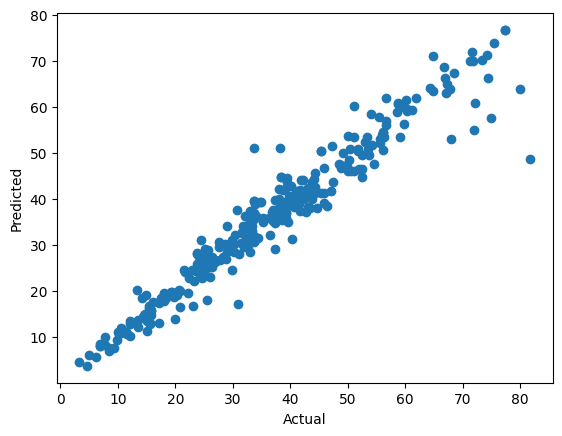

In [25]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

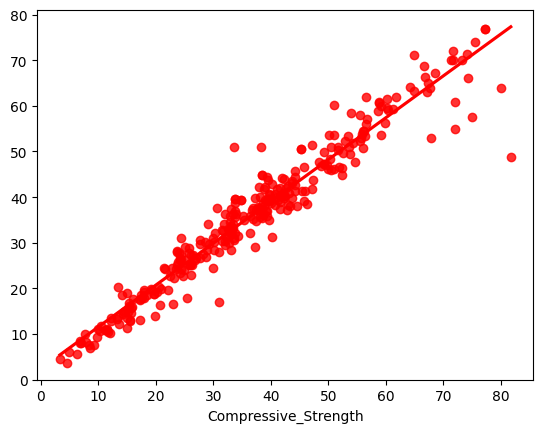

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

# Insights:

`Based on the above results, the best model seems to be the CatBoosting Regressor. It achieved the highest mean R-2 score of 93.63, indicating a better fit to the data compared to other models.`

# `Hypeparameter Tuning`

In [27]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Define the parameter grid
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.1, 0.01, 0.001],
    'iterations': [100, 200, 300]
}

# Create the CatBoostRegressor object
lin_model = CatBoostRegressor()

# Perform grid search
grid_search = GridSearchCV(lin_model, param_grid, cv=3, scoring='r2')
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the R-squared score
score = r2_score(y_test, y_pred) * 100
print("Accuracy of the model is %.2f" % score)

# Print the best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)


0:	learn: 15.0726989	total: 714us	remaining: 70.8ms
1:	learn: 14.2892453	total: 1.76ms	remaining: 86.2ms
2:	learn: 13.7838021	total: 2.37ms	remaining: 76.5ms
3:	learn: 13.2035230	total: 2.83ms	remaining: 67.8ms
4:	learn: 12.6079564	total: 3.36ms	remaining: 63.9ms
5:	learn: 12.1333734	total: 3.81ms	remaining: 59.8ms
6:	learn: 11.6521321	total: 4.29ms	remaining: 57ms
7:	learn: 11.1999896	total: 4.78ms	remaining: 55ms
8:	learn: 10.7498393	total: 5.16ms	remaining: 52.2ms
9:	learn: 10.4373803	total: 5.7ms	remaining: 51.3ms
10:	learn: 10.0830344	total: 6.22ms	remaining: 50.3ms
11:	learn: 9.6528609	total: 6.72ms	remaining: 49.3ms
12:	learn: 9.3415030	total: 7.37ms	remaining: 49.3ms
13:	learn: 9.1419430	total: 7.82ms	remaining: 48.1ms
14:	learn: 8.8208684	total: 8.28ms	remaining: 46.9ms
15:	learn: 8.5630733	total: 8.89ms	remaining: 46.7ms
16:	learn: 8.3397478	total: 11.8ms	remaining: 57.8ms
17:	learn: 8.0842029	total: 12.9ms	remaining: 58.6ms
18:	learn: 7.9746108	total: 13.9ms	remaining: 59.3m

# `Choose best model`

In [28]:
# Define the models to train
models = [
    CatBoostRegressor(depth=6,iterations=300,learning_rate=0.1)

]

# Train and evaluate each model
for model in models:
    model_name = model.__class__.__name__
    print("Training", model_name)
    
    # Create the pipeline with the preprocessor and the current model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Perform cross-validation and calculate the mean R-squared score
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='r2')
    mean_score = scores.mean()
    
    print("Mean R-squared score:", mean_score)
    print("-" * 30)

Training CatBoostRegressor
0:	learn: 14.0923093	total: 1.29ms	remaining: 385ms
1:	learn: 13.2909936	total: 2.33ms	remaining: 347ms
2:	learn: 12.6125808	total: 3.31ms	remaining: 327ms
3:	learn: 11.9776288	total: 4.61ms	remaining: 341ms
4:	learn: 11.4096466	total: 5.6ms	remaining: 331ms
5:	learn: 10.8226428	total: 6.53ms	remaining: 320ms
6:	learn: 10.3215232	total: 7.64ms	remaining: 320ms
7:	learn: 9.9012913	total: 8.73ms	remaining: 319ms
8:	learn: 9.5490382	total: 10ms	remaining: 324ms
9:	learn: 9.1715699	total: 11.6ms	remaining: 337ms
10:	learn: 8.8054510	total: 12.9ms	remaining: 339ms
11:	learn: 8.4994371	total: 14.3ms	remaining: 343ms
12:	learn: 8.2185016	total: 15.8ms	remaining: 349ms
13:	learn: 7.9812168	total: 17.3ms	remaining: 353ms
14:	learn: 7.7616042	total: 18.6ms	remaining: 353ms
15:	learn: 7.5616102	total: 19.8ms	remaining: 351ms
16:	learn: 7.3676780	total: 21ms	remaining: 350ms
17:	learn: 7.1517187	total: 22.5ms	remaining: 353ms
18:	learn: 6.9410221	total: 23.8ms	remaining:

In [9]:
import pickle


# Load preprocessor from file
with open(r'C:\Users\milan\Documents\Data_Science\Project\Concrete_Compressive_Prediction\artifacts\preprocessor.pkl', 'rb') as file:
    preprocessor = pickle.load(file)


In [10]:
import pandas as pd

# Create a DataFrame with the data to be predicted
data = pd.DataFrame({
    'Cement': [540],
    'Blast_Furnace_Slag': [0],
    'Fly_Ash': [0],
    'Water': [162],
    'Superplasticizer': [2.5],
    'Coarse_Aggregate': [1040],
    'Fine_Aggregate': [676],
    'Age': [28]
})


In [11]:
# Apply preprocessor to the data
processed_data = preprocessor.transform(data)


In [12]:
# Load the trained model
with open(r'C:\Users\milan\Documents\Data_Science\Project\Concrete_Compressive_Prediction\artifacts\model.pkl', 'rb') as file:
    model = pickle.load(file)


In [13]:
# Make predictions
predictions = model.predict(processed_data)


In [14]:
predictions

array([75.33151928])

In [15]:
# Actual 79.98611076